In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
(train_images, train_labels), (test_images, test_labels) = data

In [ ]:
len(train_images)

60000

In [ ]:
len(test_images)

10000

In [ ]:
len(test_labels)

10000

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
train_images = train_images.astype('float')/255

In [ ]:
test_images = test_images.astype('float')/255

In [ ]:
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt

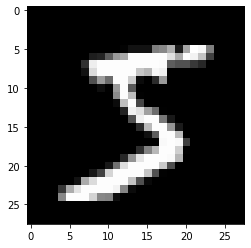

In [ ]:
plt.imshow(image.array_to_img(train_images[0]), cmap="gray")

In [ ]:
train_labels[0]

5

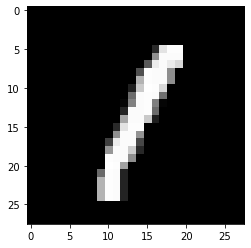

In [ ]:
plt.imshow(image.array_to_img(train_images[77]), cmap="gray")

In [ ]:
train_labels[77]

1

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [ ]:
train_labels_original[77]

1

In [ ]:
train_labels[77]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [ ]:
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 16s 264us/step - loss: 1.4959 - accuracy: 0.5761
Epoch 2/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.8945 - accuracy: 0.6047
Epoch 3/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.7101 - accuracy: 0.6076
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.6326 - accuracy: 0.7106
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.4577 - accuracy: 0.9306
Epoch 6/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.2660 - accuracy: 0.9903
Epoch 7/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1576 - accuracy: 0.9925
Epoch 8/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1026 - accuracy: 0.9934
Epoch 9/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0719 - accuracy: 0.9942
Epoch 10/10
60000/60000 [====================

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 132us/step


In [ ]:
test_loss

0.07349535135328769

In [ ]:
predictions = model.predict(test_images)

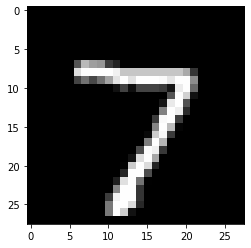

In [ ]:
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [ ]:
test_labels_original[0]

7

In [ ]:
predictions[0]

array([2.5657779e-05, 3.2044022e-04, 2.7152855e-04, 2.0898007e-04,
       1.4382029e-04, 1.5449335e-04, 6.0136685e-05, 9.9801993e-01,
       8.3551095e-05, 7.1150623e-04], dtype=float32)

In [ ]:
test_images[0].shape

(28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
img = image.load_img(path="/testimage.jpg",grayscale=True,target_size=(28,28,1)) #copy image source
img = image.img_to_array(img)
test_img = img.reshape((1,28,28,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
prediction #predict